Import Data & Check for Missing Values

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statistics as stat
from scipy import stats

missing_values = ['na','NA','N/A','n/a']
data = pd.read_csv("drug_consumption.data",header=None, na_values=missing_values)
header_cols = ['ID','Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','AScore','Cscore',
    'Impulsive','SS','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin',
    'Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA'
    ]
data.columns = header_cols

data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [2]:
# Check for missing values
chk = 0
for head in header_cols:
    null_val = data[head].isnull()
    for j in null_val:
        if j == True:
            chk = chk + 1
print(chk)

0


In [3]:
# Dictionaries for categorical variables
Nscore_xl = pd.read_excel('Dictionaries.xlsx', sheet_name = 'Nscores')
Nscore_xl = Nscore_xl.iloc[:, 1:]
Nscore_dict = Nscore_xl.set_index('Score').to_dict()['Value']

Escore_xl = pd.read_excel('Dictionaries.xlsx', sheet_name = 'Escores')
Escore_xl = Escore_xl.iloc[:, 1:]
Escore_dict = Escore_xl.set_index('Score').to_dict()['Value']

Oscore_xl = pd.read_excel('Dictionaries.xlsx', sheet_name = 'Oscores')
Oscore_xl = Oscore_xl.iloc[:, 1:]
Oscore_dict = Oscore_xl.set_index('Score').to_dict()['Value']

Ascore_xl = pd.read_excel('Dictionaries.xlsx', sheet_name = 'Ascores')
Ascore_xl = Ascore_xl.iloc[:, 1:]
Ascore_dict = Ascore_xl.set_index('Score').to_dict()['Value']

Cscore_xl = pd.read_excel('Dictionaries.xlsx', sheet_name = 'Cscores')
Cscore_xl = Cscore_xl.iloc[:, 1:]
Cscore_dict = Cscore_xl.set_index('Score').to_dict()['Value']

Age_xl = pd.read_excel('Dictionaries.xlsx', sheet_name = 'Age')
Age_xl = Age_xl.iloc[:, 1:]
Age_dict = Age_xl.set_index('Score').to_dict()['Value']

Edu_xl = pd.read_excel('Dictionaries.xlsx', sheet_name = 'Education')
Edu_xl = Edu_xl.iloc[:, 1:]
Edu_dict = Edu_xl.set_index('Score').to_dict()['Value']

Country_xl = pd.read_excel('Dictionaries.xlsx', sheet_name = 'Country')
Country_xl = Country_xl.iloc[:, 1:]
Country_dict = Country_xl.set_index('Score').to_dict()['Value']

Eth_xl = pd.read_excel('Dictionaries.xlsx', sheet_name = 'Ethnicity')
Eth_xl = Eth_xl.iloc[:, 1:]
Eth_dict = Eth_xl.set_index('Score').to_dict()['Value']

In [4]:
# Convert Scores via Dictionaries to calculate Descriptive Stats
orig_data = data.copy()
for i in range(0, len(data)):
    for keys, values in Nscore_dict.items():
        if orig_data['Nscore'][i] == values:
            orig_data['Nscore'].iat[i] = keys
    for keys, values in Escore_dict.items():
        if orig_data['Escore'][i] == values:
            orig_data['Escore'].iat[i] = keys
    for keys, values in Ascore_dict.items():
        if orig_data['AScore'][i] == values:
            orig_data['AScore'].iat[i] = keys
    for keys, values in Oscore_dict.items():
        if orig_data['Oscore'][i] == values:
            orig_data['Oscore'].iat[i] = keys
    for keys, values in Cscore_dict.items():
        if orig_data['Cscore'][i] == values:
            orig_data['Cscore'].iat[i] = keys
    for keys, values in Age_dict.items():
        if orig_data['Age'][i] == values:
            orig_data['Age'].iat[i] = keys
    for keys, values in Edu_dict.items():
        if orig_data['Education'][i] == values:
            orig_data['Education'].iat[i] = keys
    for keys, values in Country_dict.items():
        if orig_data['Country'][i] == values:
            orig_data['Country'].iat[i] = keys
    for keys, values in Eth_dict.items():
        if orig_data['Ethnicity'][i] == values:
            orig_data['Ethnicity'].iat[i] = keys
    if orig_data['Gender'][i] == 0.48246:
            orig_data['Gender'].iat[i] = 'F'
    else:
         orig_data['Gender'].iat[i] = 'M'
            
orig_data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,F,Professional certificate/ diploma,UK,Mixed-White/Asian,39.0,36.0,42.0,37.0,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,M,Doctorate degree,UK,White,29.0,52.0,55.0,48.0,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,M,Professional certificate/ diploma,UK,White,31.0,45.0,40.0,32.0,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,F,Masters degree,UK,White,34.0,34.0,46.0,47.0,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,F,Doctorate degree,UK,White,43.0,28.0,43.0,41.0,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


Splitting the Dataset

In [5]:
# Dataset 1: Tried illegal drugs at least once

df1 = data.copy()
df1 = df1.drop(columns=['ID','Country','Ethnicity'])
df1['Try_Drug'] = ''
TryD = df1['Try_Drug']

drugs = ['Amphet','Amyl','Benzos','Cannabis','Coke','Crack','Ecstasy','Heroin','Ketamine','LSD','Meth','Mushrooms','VSA']

for i in range(0, len(df1)):
    tot = 0
    for j in drugs:
        if df1[j][i] != "CL0":
            tot = tot + 1
        if tot > 0:
            TryD.iat[i] = 1
        else:
            TryD.iat[i] = 0       

# Separate data for t-test
Nvr_Tried = pd.DataFrame().assign(Nscore = orig_data['Nscore'], Escore = orig_data['Escore'], Oscore = orig_data['Oscore'], Ascore = orig_data['AScore'], Cscore = orig_data['Cscore'], 
            Impulsive = orig_data['Impulsive'], SS = orig_data['SS'] ,Try_Drug = df1['Try_Drug'])

Tried = Nvr_Tried.loc[Nvr_Tried['Try_Drug'] == 1]
Tried_Samp = Tried.sample(n=300)
Nvr_Tried = Nvr_Tried.loc[Nvr_Tried['Try_Drug'] == 0]

In [6]:
# Dataset 2: Used illegal drugs in past year

df2 = data.copy()
df2 = df2.drop(columns=['ID','Country','Ethnicity'])
df2['Try_Drug'] = ''
TryD2 = df2['Try_Drug']

for i in range(0, len(df2)):
    tot = 0
    for j in drugs:
        if df2[j][i] == "CL3" or df2[j][i] == "CL4" or df2[j][i] == "CL5" or df2[j][i] == "CL6":
            tot = tot + 1
        if tot > 0:
            TryD2.iat[i] = 1
        else:
            TryD2.iat[i] = 0    

# Separate data for t-test
Recent_N = pd.DataFrame().assign(Nscore = orig_data['Nscore'], Escore = orig_data['Escore'], Oscore = orig_data['Oscore'], Ascore = orig_data['AScore'], Cscore = orig_data['Cscore'], 
            Impulsive = orig_data['Impulsive'], SS = orig_data['SS'] ,Try_Drug = df2['Try_Drug'])

Recent_Y = Recent_N.loc[Recent_N['Try_Drug'] == 1]
Recent_Y_Samp = Recent_Y.sample(n=711)
Recent_N = Recent_N.loc[Recent_N['Try_Drug'] == 0]   

In [7]:
# Dataset 3: Tried hard drugs (heroin, crack or meth) at least once

df3 = data.copy()
df3 = df3.drop(columns=['ID','Country','Ethnicity'])
df3['Try_Drug'] = ''
TryD3 = df3['Try_Drug']

for i in range(0, len(df3)):
    if (df3['Heroin'][i] != 'CL0' or df3['Meth'][i] != 'CL0' or df3['Crack'][i] != 'CL0'):
        TryD3.iat[i] = 1
    else:
        TryD3.iat[i] = 0 

# Separate data for t-test
Heavy_N = pd.DataFrame().assign(Nscore = orig_data['Nscore'], Escore = orig_data['Escore'], Oscore = orig_data['Oscore'], Ascore = orig_data['AScore'], Cscore = orig_data['Cscore'], 
            Impulsive = orig_data['Impulsive'], SS = orig_data['SS'] ,Try_Drug = df3['Try_Drug'])

Heavy_Y = Heavy_N.loc[Heavy_N['Try_Drug'] == 1]
Heavy_N = Heavy_N.loc[Heavy_N['Try_Drug'] == 0] 
Heavy_N_Samp = Heavy_N.sample(n=579)

In [8]:
# Sense Check
print(sum(TryD))
print(sum(TryD2))
print(sum(TryD3))

1585
1174
579


Descriptive Statistics

In [9]:
# Descriptive Statistics of Personality Traits

# Means
print("Means:")
print("Nscore: {:.2f}".format(orig_data['Nscore'].mean()))
print("Escore: {:.2f}".format(orig_data['Escore'].mean()))
print("Oscore: {:.2f}".format(orig_data['Oscore'].mean()))
print("Ascore: {:.2f}".format(orig_data['AScore'].mean()))
print("Cscore: {:.2f}".format(orig_data['Cscore'].mean()))

# Standard Devs
print("\nStandard Deviations:")
print("Nscore: {:.2f}".format(orig_data['Nscore'].std()))
print("Escore: {:.2f}".format(orig_data['Escore'].std()))
print("Oscore: {:.2f}".format(orig_data['Oscore'].std()))
print("Ascore: {:.2f}".format(orig_data['AScore'].std()))
print("Cscore: {:.2f}".format(orig_data['Cscore'].std()))

Means:
Nscore: 35.92
Escore: 39.58
Oscore: 45.76
Ascore: 42.87
Cscore: 41.44

Standard Deviations:
Nscore: 9.14
Escore: 6.77
Oscore: 6.58
Ascore: 6.44
Cscore: 6.97


Checks for Normality

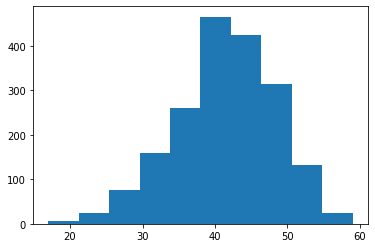

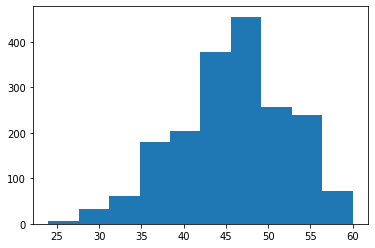

In [38]:
# Checking Normality with Histogram
plt.hist(orig_data['Cscore'])
plt.show()

plt.hist(orig_data['Oscore'])
plt.show()

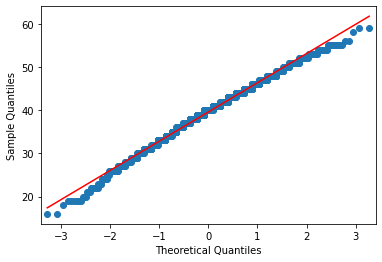

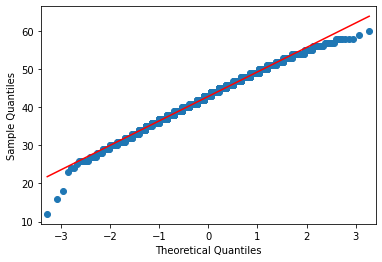

In [40]:
# Q-Q Plot

import statsmodels.api as sm
import pylab as py 

sm.qqplot(orig_data['Escore'], line='s')
py.show()

sm.qqplot(orig_data['AScore'], line='s')
py.show()

In [13]:
# Shapiro-Wilk test for normality
import scipy
from scipy import stats
print("P-values:")
print("N: {:.2E}".format(scipy.stats.shapiro(orig_data['Nscore']).pvalue))
print("E: {:.2E}".format(scipy.stats.shapiro(orig_data['Escore']).pvalue))
print("A: {:.2E}".format(scipy.stats.shapiro(orig_data['AScore']).pvalue))
print("O: {:.2E}".format(scipy.stats.shapiro(orig_data['Oscore']).pvalue))
print("C: {:.2E}".format(scipy.stats.shapiro(orig_data['Cscore']).pvalue))

P-values:
N: 2.09E-08
E: 1.10E-07
A: 3.85E-08
O: 6.76E-11
C: 2.19E-12


In [27]:
# Excess Kurtosis
print("\nKurtosis:")
print("Nscore: {:.2f}".format(scipy.stats.kurtosis(orig_data['Nscore'])))
print("Escore: {:.2f}".format(scipy.stats.kurtosis(orig_data['Escore'])))
print("Oscore: {:.2f}".format(scipy.stats.kurtosis(orig_data['Oscore'])))
print("Ascore: {:.2f}".format(scipy.stats.kurtosis(orig_data['AScore'])))
print("Cscore: {:.2f}".format(scipy.stats.kurtosis(orig_data['Cscore'])))

# Skewness
print("\nSkewness:")
print("Nscore: {:.2f}".format(scipy.stats.skew(orig_data['Nscore'])))
print("Escore: {:.2f}".format(scipy.stats.skew(orig_data['Escore'])))
print("Oscore: {:.2f}".format(scipy.stats.skew(orig_data['Oscore'])))
print("Ascore: {:.2f}".format(scipy.stats.skew(orig_data['AScore'])))
print("Cscore: {:.2f}".format(scipy.stats.skew(orig_data['Cscore'])))


Kurtosis:
Nscore: -0.55
Escore: 0.06
Oscore: -0.28
Ascore: 0.13
Cscore: -0.17

Skewness:
Nscore: 0.12
Escore: -0.27
Oscore: -0.30
Ascore: -0.27
Cscore: -0.39


T-tests

In [41]:
# Comparing sample means of drug users and non-users: Dataset 1

print("Means of Non-Users:")
print("N: {:.2f}".format(Nvr_Tried['Nscore'].mean()))
print("E: {:.2f}".format(Nvr_Tried['Escore'].mean()))
print("O: {:.2f}".format(Nvr_Tried['Oscore'].mean()))
print("A: {:.2f}".format(Nvr_Tried['Ascore'].mean()))
print("C: {:.2f}".format(Nvr_Tried['Cscore'].mean()))

print("\nMeans of Users:")
print("N: {:.2f}".format(Tried_Samp['Nscore'].mean()))
print("E: {:.2f}".format(Tried_Samp['Escore'].mean()))
print("O: {:.2f}".format(Tried_Samp['Oscore'].mean()))
print("A: {:.2f}".format(Tried_Samp['Ascore'].mean()))
print("C: {:.2f}".format(Tried_Samp['Cscore'].mean()))

Means of Non-Users:
N: 33.09
E: 40.74
O: 41.72
A: 44.99
C: 45.44

Means of Users:
N: 37.11
E: 39.42
O: 46.92
A: 42.16
C: 40.35


In [42]:
# Wilcoxon Signed Rank test (non-normal data) to determine differences in means: Dataset 1

print("N: {:.3E}".format(stats.wilcoxon(Nvr_Tried['Nscore'], Tried_Samp['Nscore']).pvalue))
print("E: {:.3E}".format(stats.wilcoxon(Nvr_Tried['Escore'], Tried_Samp['Escore']).pvalue))
print("A: {:.3E}".format(stats.wilcoxon(Nvr_Tried['Oscore'], Tried_Samp['Oscore']).pvalue))
print("O: {:.3E}".format(stats.wilcoxon(Nvr_Tried['Ascore'], Tried_Samp['Ascore']).pvalue))
print("C: {:.3E}".format(stats.wilcoxon(Nvr_Tried['Cscore'], Tried_Samp['Cscore']).pvalue))

N: 2.270E-08
E: 4.427E-02
A: 5.752E-19
O: 7.628E-07
C: 3.169E-17


In [43]:
# Comparing sample means of drug users and non-users: Dataset 2

print("Means of Non-Users:")
print("N: {:.2f}".format(Recent_N['Nscore'].mean()))
print("E: {:.2f}".format(Recent_N['Escore'].mean()))
print("O: {:.2f}".format(Recent_N['Oscore'].mean()))
print("A: {:.2f}".format(Recent_N['Ascore'].mean()))
print("C: {:.2f}".format(Recent_N['Cscore'].mean()))

print("\nMeans of Users:")
print("N: {:.2f}".format(Recent_Y_Samp['Nscore'].mean()))
print("E: {:.2f}".format(Recent_Y_Samp['Escore'].mean()))
print("O: {:.2f}".format(Recent_Y_Samp['Oscore'].mean()))
print("A: {:.2f}".format(Recent_Y_Samp['Ascore'].mean()))
print("C: {:.2f}".format(Recent_Y_Samp['Cscore'].mean()))

Means of Non-Users:
N: 33.80
E: 40.25
O: 42.64
A: 44.39
C: 44.23

Means of Users:
N: 37.54
E: 38.94
O: 47.52
A: 42.05
C: 39.69


In [44]:
# Wilcoxon Signed Rank test (non-normal data) to determine differences in means: Dataset 2

print("N: {:.3E}".format(stats.wilcoxon(Recent_N['Nscore'], Recent_Y_Samp['Nscore']).pvalue))
print("E: {:.3E}".format(stats.wilcoxon(Recent_N['Escore'], Recent_Y_Samp['Escore']).pvalue))
print("A: {:.3E}".format(stats.wilcoxon(Recent_N['Oscore'], Recent_Y_Samp['Oscore']).pvalue))
print("O: {:.3E}".format(stats.wilcoxon(Recent_N['Ascore'], Recent_Y_Samp['Ascore']).pvalue))
print("C: {:.3E}".format(stats.wilcoxon(Recent_N['Cscore'], Recent_Y_Samp['Cscore']).pvalue))

N: 2.186E-14
E: 4.211E-04
A: 1.328E-42
O: 5.423E-13
C: 5.749E-35


In [45]:
# Comparing sample means of drug users and non-users: Dataset 3

print("Means of Non-Users:")
print("N: {:.2f}".format(Heavy_N_Samp['Nscore'].mean()))
print("E: {:.2f}".format(Heavy_N_Samp['Escore'].mean()))
print("O: {:.2f}".format(Heavy_N_Samp['Oscore'].mean()))
print("A: {:.2f}".format(Heavy_N_Samp['Ascore'].mean()))
print("C: {:.2f}".format(Heavy_N_Samp['Cscore'].mean()))

print("\nMeans of Users:")
print("N: {:.2f}".format(Heavy_Y['Nscore'].mean()))
print("E: {:.2f}".format(Heavy_Y['Escore'].mean()))
print("O: {:.2f}".format(Heavy_Y['Oscore'].mean()))
print("A: {:.2f}".format(Heavy_Y['Ascore'].mean()))
print("C: {:.2f}".format(Heavy_Y['Cscore'].mean()))

Means of Non-Users:
N: 35.04
E: 40.27
O: 44.84
A: 43.63
C: 42.55

Means of Users:
N: 38.53
E: 38.40
O: 47.94
A: 41.19
C: 39.07


In [47]:
# Wilcoxon Signed Rank test (non-normal data) to determine differences in means: Dataset 3

print("N: {:.3E}".format(stats.wilcoxon(Heavy_N_Samp['Nscore'], Heavy_Y['Nscore']).pvalue))
print("E: {:.3E}".format(stats.wilcoxon(Heavy_N_Samp['Escore'], Heavy_Y['Escore']).pvalue))
print("A: {:.3E}".format(stats.wilcoxon(Heavy_N_Samp['Oscore'], Heavy_Y['Oscore']).pvalue))
print("O: {:.3E}".format(stats.wilcoxon(Heavy_N_Samp['Ascore'], Heavy_Y['Ascore']).pvalue))
print("C: {:.3E}".format(stats.wilcoxon(Heavy_N_Samp['Cscore'], Heavy_Y['Cscore']).pvalue))

N: 5.479E-11
E: 3.469E-06
A: 1.777E-15
O: 6.027E-10
C: 4.328E-17


Popularity of Each Substance

In [48]:
# Graphically Show the Number of People that have Tried Each Legal and Illegal Drug/Substance (Dataset 1)
import pygal
from pygal.style import DefaultStyle

Graph_data = data.copy()
Graph_data = Graph_data.iloc[:,13:32]
Graph_data = Graph_data.drop(columns = ['Semer'])
for col in Graph_data.columns:
    for i in range(0, len(Graph_data)):
        if Graph_data[col][i] == 'CL0':
            Graph_data[col].iat[i] = 0
        else:
            Graph_data[col].iat[i] = 1
Graph_data = Graph_data.astype(float)

barvalues = []
barheaders = []
for col in Graph_data.columns:
    tot_count = sum(Graph_data[col])
    barvalues.append((tot_count/1885)*100)
    barheaders.append(col)

barchart = pygal.Bar(title = "Percentage of People that have Tried Each Substance", style = DefaultStyle, y_title = 'Percent %', width = 900, range = (0,100))
for i in range(0, len(barvalues)):
    barchart.add(str(barheaders[i]), [{'value': barvalues[i], 'xlabel': barheaders[i]}])
barchart.render_to_file('drug_popularity.svg')

Correlations

In [57]:
# Correlations between different drugs (Dataset 1)
from scipy.stats import pearsonr
import collections

correlations = Graph_data.copy()
C = correlations.corr()

sub1 = []
sub2 = []
corr_val = []
pval = []

for i in correlations.columns:
    for j in correlations.columns:
        PCC = pearsonr(correlations[i], correlations[j])
        sub1.append(i)
        sub2.append(j)
        corr_val.append(PCC[0])
        pval.append(PCC[1])
corr_df = pd.DataFrame().assign(Substance_1 = sub1, Substance_2 = sub2, Correlation_Value = corr_val, P_Value = pval)
corr_df['Pair'] = corr_df['Substance_1'] + ' - ' + corr_df['Substance_2']

corr_df = corr_df.loc[corr_df['Substance_1'] != corr_df['Substance_2']]
corr_df = corr_df.sort_values('Correlation_Value', ascending = False)
corr_df = corr_df.iloc[::2]
corr_df['Significance Level'] = ''
for i in range(0, len(corr_df)):
    if corr_df['P_Value'].iloc[i] < 0.0001:
        corr_df['Significance Level'].iat[i] = '****'
    elif corr_df['P_Value'].iloc[i] < 0.001 and corr_df['P_Value'].iloc[i] > 0.0001:
        corr_df['Significance Level'].iat[i] = '***'
    elif corr_df['P_Value'].iloc[i] < 0.01 and corr_df['P_Value'].iloc[i] > 0.001:
        corr_df['Significance Level'].iat[i] = '**'
    elif corr_df['P_Value'].iloc[i] < 0.05 and corr_df['P_Value'].iloc[i] > 0.01:
        corr_df['Significance Level'].iat[i] = '*'

Top_corr = corr_df.iloc[0:20, :]
most_common = []
for i in range(0, len(Top_corr)):
    most_common.append(Top_corr['Substance_1'].iloc[i])
    most_common.append(Top_corr['Substance_2'].iloc[i])

counter = collections.Counter(most_common)
print(counter.most_common())

[('Ecstasy', 7), ('Mushrooms', 6), ('Amphet', 6), ('LSD', 4), ('Coke', 4), ('Cannabis', 4), ('Heroin', 2), ('Legalh', 2), ('Crack', 1), ('Nicotine', 1), ('Meth', 1), ('Ketamine', 1), ('Benzos', 1)]


Dataset 1 Models

In [58]:
# Modelling - Dataset 1
inputs = df1.iloc[:, :10]
output = df1.iloc[:, 29]
inputs = inputs.astype(float)
output = output.astype(float)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, output, test_size=0.25, random_state=0)

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
scorer = make_scorer(recall_score, pos_label = 0)

In [59]:
# Naive-Bayes
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB.fit(x_train, y_train)

y_pred_NB = classifierNB.predict(x_test)
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)
print(conf_mat_NB)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_NB)*100))

# Sensitivty & Specificity
Tn_NB, Fp_NB, Fn_NB, Tp_NB = confusion_matrix(y_test, y_pred_NB).ravel()
SensitivityNB = recall_score(y_test, y_pred_NB)*100
SpecificityNB = (Tn_NB/(Tn_NB + Fp_NB))*100 
print("Recall: {:.2f}%".format(SensitivityNB))
print("Specificity: {:.2f}%".format(SpecificityNB))

[[ 51  29]
 [ 48 344]]
Accuracy: 83.69%
Recall: 87.76%
Specificity: 63.75%


In [92]:
# Cross-fold validation NB
cv_acc_NB = cross_val_score(estimator = classifierNB, X = x_train, y = y_train, cv = 10)
cv_prec_NB = cross_val_score(classifierNB, x_train, y_train, cv=10, scoring = 'precision')
cv_recalls_NB = cross_val_score(classifierNB, x_train, y_train, cv=10, scoring = 'recall_macro')
cv_spec_NB = cross_val_score(classifierNB, x_train, y_train, cv=10, scoring = scorer)

print("Accuracy: {:.2f}%".format(cv_acc_NB.mean()*100))
print("Standard Deviation: {:.2f}%".format(cv_acc_NB.std()*100))
print("Recall: {:.2f}%".format(cv_recalls_NB.mean()*100))
print("Specificity: {:.2f}%".format(cv_spec_NB.mean()*100))

Accuracy: 79.55%
Standard Deviation: 3.15%
Recall: 68.61%
Specificity: 52.73%


In [95]:
# SVM
from sklearn.svm import SVC
classifierSVM = SVC(kernel = 'rbf', random_state=0)
classifierSVM.fit(x_train, y_train)

y_predSVM = classifierSVM.predict(x_test)
conf_matSVM = confusion_matrix(y_test, y_predSVM)
print(conf_matSVM)
print(("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_predSVM)*100)))

# Sensitivty & Specificity
Tn_SVM, Fp_SVM, Fn_SVM, Tp_SVM = confusion_matrix(y_test, y_predSVM).ravel()
SensitivitySVM = recall_score(y_test, y_predSVM)*100
SpecificitySVM = (Tn_SVM/(Tn_SVM + Fp_SVM))*100 
print("Recall: {:.2f}%".format(SensitivitySVM))
print("Specificity: {:.2f}%".format(SpecificitySVM))

[[  3  77]
 [  5 387]]
Accuracy: 82.63%
Recall: 98.72%
Specificity: 3.75%


In [96]:
# Cross-fold validation SVM
cv_acc_SVM = cross_val_score(estimator = classifierSVM, X = x_train, y = y_train, cv = 10)
cv_recalls_SVM = cross_val_score(classifierSVM, x_train, y_train, cv=10, scoring = 'recall_macro')
cv_spec_SVM = cross_val_score(classifierSVM, x_train, y_train, cv=10, scoring = scorer)

print("Accuracy: {:.2f}%".format(cv_acc_SVM.mean()*100))
print("Standard Deviation: {:.2f}%".format(cv_acc_SVM.std()*100))
print("Recall: {:.2f}%".format(cv_recalls_SVM.mean()*100))
print("Specificity: {:.2f}%".format(cv_spec_SVM.mean()*100))

Accuracy: 84.57%
Standard Deviation: 0.51%
Recall: 51.94%
Specificity: 4.55%


In [63]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifierDTC = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifierDTC.fit(x_train, y_train)

y_predDTC = classifierDTC.predict(x_test)
conf_matDTC = confusion_matrix(y_test, y_predDTC)
print(conf_matDTC)
print(("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_predDTC)*100)))

# Sensitivty & Specificity
Tn_DTC, Fp_DTC, Fn_DTC, Tp_DTC = confusion_matrix(y_test, y_predDTC).ravel()
SensitivityDTC = recall_score(y_test, y_predDTC)*100
SpecificityDTC = (Tn_DTC/(Tn_DTC + Fp_DTC))*100 
print("Recall: {:.2f}%".format(SensitivityDTC))
print("Specificity: {:.2f}%".format(SpecificityDTC))

[[ 30  50]
 [ 49 343]]
Accuracy: 79.03%
Recall: 87.50%
Specificity: 37.50%


In [64]:
# Cross-fold validation Decision Tree
cv_acc_DTC = cross_val_score(estimator = classifierDTC, X = x_train, y = y_train, cv = 10)
cv_recalls_DTC = cross_val_score(classifierDTC, x_train, y_train, cv=10, scoring = 'recall_macro')
cv_spec_DTC = cross_val_score(classifierDTC, x_train, y_train, cv=10, scoring = scorer)

print("Accuracy: {:.2f}%".format(cv_acc_DTC.mean()*100))
print("Standard Deviation: {:.2f}%".format(cv_acc_DTC.std()*100))
print("Recall: {:.2f}%".format(cv_recalls_DTC.mean()*100))
print("Specificity: {:.2f}%".format(cv_spec_DTC.mean()*100))

Accuracy: 75.72%
Standard Deviation: 3.58%
Recall: 57.26%
Specificity: 30.45%


In [65]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
classifierRFC = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifierRFC.fit(x_train, y_train)

y_predRFC = classifierRFC.predict(x_test)
conf_matRFC = confusion_matrix(y_test, y_predRFC)
print(conf_matRFC)
print(("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_predRFC)*100)))

# Sensitivty & Specificity
Tn_RFC, Fp_RFC, Fn_RFC, Tp_RFC = confusion_matrix(y_test, y_predRFC).ravel()
SensitivityRFC = recall_score(y_test, y_predRFC)*100
SpecificityRFC = (Tn_RFC/(Tn_RFC + Fp_RFC))*100 
print("Recall: {:.2f}%".format(SensitivityRFC))
print("Specificity: {:.2f}%".format(SpecificityRFC))

[[ 24  56]
 [ 28 364]]
Accuracy: 82.20%
Recall: 92.86%
Specificity: 30.00%


In [66]:
# Cross-fold validation Random Forest
cv_acc_RFC = cross_val_score(estimator = classifierRFC, X = x_train, y = y_train, cv = 10)
cv_recalls_RFC = cross_val_score(classifierRFC, x_train, y_train, cv=10, scoring = 'recall_macro')
cv_spec_RFC = cross_val_score(classifierRFC, x_train, y_train, cv=10, scoring = scorer)

print("Accuracy: {:.2f}%".format(cv_acc_RFC.mean()*100))
print("Standard Deviation: {:.2f}%".format(cv_acc_RFC.std()*100))
print("Recall: {:.2f}%".format(cv_recalls_RFC.mean()*100))
print("Specificity: {:.2f}%".format(cv_spec_RFC.mean()*100))

Accuracy: 83.23%
Standard Deviation: 3.07%
Recall: 59.67%
Specificity: 25.45%


In [67]:
# XGBboost
import xgboost as xgb
classifierXGB = xgb.XGBClassifier()
classifierXGB.fit(x_train, y_train)

y_predXGB = classifierXGB.predict(x_test)
conf_matXGB = confusion_matrix(y_test, y_predXGB)
print(conf_matXGB)
print(("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_predXGB)*100)))

# Sensitivty & Specificity
Tn_XGB, Fp_XGB, Fn_XGB, Tp_XGB = confusion_matrix(y_test, y_predXGB).ravel()
SensitivityXGB = recall_score(y_test, y_predXGB)*100
SpecificityXGB = (Tn_XGB/(Tn_XGB + Fp_XGB))*100 
print("Recall: {:.2f}%".format(SensitivityXGB))
print("Specificity: {:.2f}%".format(SpecificityXGB))

[[ 26  54]
 [ 30 362]]
Accuracy: 82.20%
Recall: 92.35%
Specificity: 32.50%


In [68]:
# Cross-fold validation XGBoost
cv_acc_XGB = cross_val_score(estimator = classifierXGB, X = x_train, y = y_train, cv = 10)
cv_recalls_XGB = cross_val_score(classifierXGB, x_train, y_train, cv=10, scoring = 'recall_macro')
cv_spec_XGB = cross_val_score(classifierXGB, x_train, y_train, cv=10, scoring = scorer)

print("Accuracy: {:.2f}%".format(cv_acc_XGB.mean()*100))
print("Standard Deviation: {:.2f}%".format(cv_acc_XGB.std()*100))
print("Recall: {:.2f}%".format(cv_recalls_XGB.mean()*100))
print("Specificity: {:.2f}%".format(cv_spec_XGB.mean()*100))

Accuracy: 82.24%
Standard Deviation: 2.25%
Recall: 59.08%
Specificity: 25.45%


Dataset 2 Models

In [69]:
# Dataset 2
inputs2 = df2.iloc[:, :10]
output2 = df2.iloc[:, 29]
inputs2 = inputs2.astype(float)
output2 = output2.astype(float)

x_train2, x_test2, y_train2, y_test2 = train_test_split(inputs2, output2, test_size=0.25, random_state=0)

In [70]:
# Naive-Bayes
from sklearn.naive_bayes import GaussianNB
classifierNB2 = GaussianNB()
classifierNB2.fit(x_train2, y_train2)

y_pred_NB2 = classifierNB2.predict(x_test2)
conf_mat_NB2 = confusion_matrix(y_test2, y_pred_NB2)
print(conf_mat_NB2)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test2, y_pred_NB2)*100))

# Sensitivty & Specificity
Tn_NB2, Fp_NB2, Fn_NB2, Tp_NB2 = confusion_matrix(y_test2, y_pred_NB2).ravel()
SensitivityNB2 = recall_score(y_test2, y_pred_NB2)*100
SpecificityNB2 = (Tn_NB2/(Tn_NB2 + Fp_NB2))*100 
print("Recall: {:.2f}%".format(SensitivityNB2))
print("Specificity: {:.2f}%".format(SpecificityNB2))

[[141  40]
 [ 45 246]]
Accuracy: 81.99%
Recall: 84.54%
Specificity: 77.90%


In [71]:
# Cross-fold validation NB
cv_acc_NB2 = cross_val_score(estimator = classifierNB2, X = x_train2, y = y_train2, cv = 10)
cv_prec_NB2 = cross_val_score(classifierNB2, x_train2, y_train2, cv=10, scoring = 'precision')
cv_recalls_NB2 = cross_val_score(classifierNB2, x_train2, y_train2, cv=10, scoring = 'recall_macro')
cv_spec_NB2 = cross_val_score(classifierNB2, x_train2, y_train2, cv=10, scoring = scorer)

print("Accuracy: {:.2f}%".format(cv_acc_NB2.mean()*100))
print("Standard Deviation: {:.2f}%".format(cv_acc_NB2.std()*100))
print("Recall: {:.2f}%".format(cv_recalls_NB2.mean()*100))
print("Specificity: {:.2f}%".format(cv_spec_NB2.mean()*100))

Accuracy: 78.56%
Standard Deviation: 2.69%
Recall: 77.82%
Specificity: 74.91%


In [99]:
# SVM
from sklearn.svm import SVC
classifierSVM2 = SVC(kernel = 'rbf', random_state=0, C=1000, gamma=0.001)
classifierSVM2.fit(x_train2, y_train2)

y_predSVM2 = classifierSVM2.predict(x_test2)
conf_matSVM2 = confusion_matrix(y_test2, y_predSVM2)
print(conf_matSVM2)
print(("Accuracy: {:.2f}%".format(accuracy_score(y_test2, y_predSVM2)*100)))

# Sensitivty & Specificity
Tn_SVM2, Fp_SVM2, Fn_SVM2, Tp_SVM2 = confusion_matrix(y_test2, y_predSVM2).ravel()
SensitivitySVM2 = recall_score(y_test2, y_predSVM2)*100
SpecificitySVM2 = (Tn_SVM2/(Tn_SVM2 + Fp_SVM2))*100 
print("Recall: {:.2f}%".format(SensitivitySVM2))
print("Specificity: {:.2f}%".format(SpecificitySVM2))

[[137  44]
 [ 41 250]]
Accuracy: 81.99%
Recall: 85.91%
Specificity: 75.69%


In [100]:
# Cross-fold validation SVM
cv_acc_SVM2 = cross_val_score(estimator = classifierSVM2, X = x_train2, y = y_train2, cv = 10)
cv_recalls_SVM2 = cross_val_score(classifierSVM2, x_train2, y_train2, cv=10, scoring = 'recall_macro')
cv_spec_SVM2 = cross_val_score(classifierSVM2, x_train2, y_train2, cv=10, scoring = scorer)

print("Accuracy: {:.2f}%".format(cv_acc_SVM2.mean()*100))
print("Standard Deviation: {:.2f}%".format(cv_acc_SVM2.std()*100))
print("Recall: {:.2f}%".format(cv_recalls_SVM2.mean()*100))
print("Specificity: {:.2f}%".format(cv_spec_SVM2.mean()*100))

Accuracy: 80.96%
Standard Deviation: 3.10%
Recall: 79.94%
Specificity: 75.85%


In [74]:
from sklearn.model_selection import GridSearchCV
parameters2 = [{'C':[0.1, 1, 10, 100], 'kernel':['linear']},
               {'C':[0.1, 1, 10, 100, 1000, 10000], 'kernel':['rbf'], 'gamma':[0.0001, 0.001, 0.01, 0.1]},
               {'C':[0.1, 1, 10, 100], 'kernel':['poly'], 'degree':[2, 3, 4]},
               {'C':[0.1, 1, 10, 100], 'kernel':['sigmoid'], 'gamma':[0.001, 0.01, 0.1]}]
gridsearch2 = GridSearchCV(estimator=classifierSVM2, param_grid=parameters2, scoring= scorer, cv=10, n_jobs=-1)
gridsearch2.fit(x_train2, y_train2)
best_Acc2 = gridsearch2.best_score_
best_parameters2 = gridsearch2.best_params_
print("Best Accuracy: {:.2f}%".format(best_Acc2*100))
print("Best Parameters:", best_parameters2)

Best Accuracy: 75.85%
Best Parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [75]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifierDTC2 = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifierDTC2.fit(x_train2, y_train2)

y_predDTC2 = classifierDTC2.predict(x_test2)
conf_matDTC2 = confusion_matrix(y_test2, y_predDTC2)
print(conf_matDTC2)
print(("Accuracy: {:.2f}%".format(accuracy_score(y_test2, y_predDTC2)*100)))

# Sensitivty & Specificity
Tn_DTC2, Fp_DTC2, Fn_DTC2, Tp_DTC2 = confusion_matrix(y_test2, y_predDTC2).ravel()
SensitivityDTC2 = recall_score(y_test2, y_predDTC2)*100
SpecificityDTC2 = (Tn_DTC2/(Tn_DTC2 + Fp_DTC2))*100 
print("Recall: {:.2f}%".format(SensitivityDTC2))
print("Specificity: {:.2f}%".format(SpecificityDTC2))

[[103  78]
 [ 62 229]]
Accuracy: 70.34%
Recall: 78.69%
Specificity: 56.91%


In [76]:
# Cross-fold validation Decision Tree
cv_acc_DTC2 = cross_val_score(estimator = classifierDTC2, X = x_train2, y = y_train2, cv = 10)
cv_recalls_DTC2 = cross_val_score(classifierDTC2, x_train2, y_train2, cv=10, scoring = 'recall_macro')
cv_spec_DTC2 = cross_val_score(classifierDTC2, x_train2, y_train2, cv=10, scoring = scorer)

print("Accuracy: {:.2f}%".format(cv_acc_DTC2.mean()*100))
print("Standard Deviation: {:.2f}%".format(cv_acc_DTC2.std()*100))
print("Recall: {:.2f}%".format(cv_recalls_DTC2.mean()*100))
print("Specificity: {:.2f}%".format(cv_spec_DTC2.mean()*100))

Accuracy: 72.04%
Standard Deviation: 4.58%
Recall: 70.16%
Specificity: 62.64%


In [77]:
feature_importancesDTC = pd.DataFrame(classifierDTC2.feature_importances_, index = x_train2.columns, columns=['Importance']).sort_values('Importance', ascending=False) 
print(feature_importancesDTC)

           Importance
SS           0.175435
Oscore       0.135807
Nscore       0.129530
Cscore       0.107388
Escore       0.103259
Education    0.102178
Age          0.102141
AScore       0.068667
Impulsive    0.050702
Gender       0.024892


In [78]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
classifierRFC2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifierRFC2.fit(x_train2, y_train2)

y_predRFC2 = classifierRFC2.predict(x_test2)
conf_matRFC2 = confusion_matrix(y_test2, y_predRFC2)
print(conf_matRFC2)
print(("Accuracy: {:.2f}%".format(accuracy_score(y_test2, y_predRFC2)*100)))

# Sensitivty & Specificity
Tn_RFC2, Fp_RFC2, Fn_RFC2, Tp_RFC2 = confusion_matrix(y_test2, y_predRFC2).ravel()
SensitivityRFC2 = recall_score(y_test2, y_predRFC2)*100
SpecificityRFC2 = (Tn_RFC2/(Tn_RFC2 + Fp_RFC2))*100 
print("Recall: {:.2f}%".format(SensitivityRFC2))
print("Specificity: {:.2f}%".format(SpecificityRFC2))

[[143  38]
 [ 58 233]]
Accuracy: 79.66%
Recall: 80.07%
Specificity: 79.01%


In [79]:
# Cross-fold validation Random Forest
cv_acc_RFC2 = cross_val_score(estimator = classifierRFC2, X = x_train2, y = y_train2, cv = 10)
cv_recalls_RFC2 = cross_val_score(classifierRFC2, x_train2, y_train2, cv=10, scoring = 'recall_macro')
cv_spec_RFC2 = cross_val_score(classifierRFC2, x_train2, y_train2, cv=10, scoring = scorer)

print("Accuracy: {:.2f}%".format(cv_acc_RFC2.mean()*100))
print("Standard Deviation: {:.2f}%".format(cv_acc_RFC2.std()*100))
print("Recall: {:.2f}%".format(cv_recalls_RFC2.mean()*100))
print("Specificity: {:.2f}%".format(cv_spec_RFC2.mean()*100))

Accuracy: 77.56%
Standard Deviation: 4.28%
Recall: 76.92%
Specificity: 74.34%


In [80]:
feature_importancesRFC = pd.DataFrame(classifierRFC2.feature_importances_, index = x_train2.columns, columns=['Importance']).sort_values('Importance', ascending=False) 
print(feature_importancesRFC)

           Importance
SS           0.174336
Oscore       0.148482
Cscore       0.111611
Age          0.108487
Nscore       0.102254
Escore       0.101133
AScore       0.091322
Education    0.068495
Impulsive    0.058337
Gender       0.035543


In [81]:
# XGBboost
import xgboost as xgb
classifierXGB2 = xgb.XGBClassifier()
classifierXGB2.fit(x_train2, y_train2)

y_predXGB2 = classifierXGB2.predict(x_test2)
conf_matXGB2 = confusion_matrix(y_test2, y_predXGB2)
print(conf_matXGB2)
print(("Accuracy: {:.2f}%".format(accuracy_score(y_test2, y_predXGB2)*100)))

# Sensitivty & Specificity
Tn_XGB2, Fp_XGB2, Fn_XGB2, Tp_XGB2 = confusion_matrix(y_test2, y_predXGB2).ravel()
SensitivityXGB2 = recall_score(y_test2, y_predXGB2)*100
SpecificityXGB2 = (Tn_XGB2/(Tn_XGB2 + Fp_XGB2))*100 
print("Recall: {:.2f}%".format(SensitivityXGB2))
print("Specificity: {:.2f}%".format(SpecificityXGB2))

[[138  43]
 [ 45 246]]
Accuracy: 81.36%
Recall: 84.54%
Specificity: 76.24%


In [82]:
# Cross-fold validation XGBoost
cv_acc_XGB2 = cross_val_score(estimator = classifierXGB2, X = x_train2, y = y_train2, cv = 10)
cv_recalls_XGB2 = cross_val_score(classifierXGB2, x_train2, y_train2, cv=10, scoring = 'recall_macro')
cv_spec_XGB2 = cross_val_score(classifierXGB2, x_train2, y_train2, cv=10, scoring = scorer)

print("Accuracy: {:.2f}%".format(cv_acc_XGB2.mean()*100))
print("Standard Deviation: {:.2f}%".format(cv_acc_XGB2.std()*100))
print("Recall: {:.2f}%".format(cv_recalls_XGB2.mean()*100))
print("Specificity: {:.2f}%".format(cv_spec_XGB2.mean()*100))

Accuracy: 78.27%
Standard Deviation: 3.61%
Recall: 76.92%
Specificity: 71.51%


In [83]:
feature_importancesXGB = pd.DataFrame(classifierXGB2.feature_importances_, index = x_train2.columns, columns=['Importance']).sort_values('Importance', ascending=False) 
print(feature_importancesXGB)

           Importance
Age          0.210477
SS           0.184196
Gender       0.101149
Education    0.091023
Oscore       0.090485
Cscore       0.068642
Nscore       0.068575
Escore       0.065901
Impulsive    0.060518
AScore       0.059034


Dataset 3 Models

In [84]:
# Dataset 3
inputs3 = df3.iloc[:, :10]
output3 = df3.iloc[:, 29]
inputs3 = inputs3.astype(float)
output3 = output3.astype(float)

x_train3, x_test3, y_train3, y_test3 = train_test_split(inputs3, output3, test_size=0.25, random_state=0)

In [86]:
# Naive-Bayes
from sklearn.naive_bayes import GaussianNB
classifierNB3 = GaussianNB()
classifierNB3.fit(x_train3, y_train3)

y_pred_NB3 = classifierNB3.predict(x_test3)
conf_mat_NB3 = confusion_matrix(y_test3, y_pred_NB3)
print(conf_mat_NB3)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test3, y_pred_NB3)*100))

# Sensitivty & Specificity
Tn_NB3, Fp_NB3, Fn_NB3, Tp_NB3 = confusion_matrix(y_test3, y_pred_NB3).ravel()
SensitivityNB3 = recall_score(y_test3, y_pred_NB3)*100
SpecificityNB3 = (Tn_NB3/(Tn_NB3 + Fp_NB3))*100 
print("Recall: {:.2f}%".format(SensitivityNB3))
print("Specificity: {:.2f}%".format(SpecificityNB3))

[[258  71]
 [ 63  80]]
Accuracy: 71.61%
Recall: 55.94%
Specificity: 78.42%


In [87]:
# Cross-fold validation NB
cv_acc_NB3 = cross_val_score(estimator = classifierNB3, X = x_train3, y = y_train3, cv = 10)
cv_recalls_NB3 = cross_val_score(classifierNB3, x_train3, y_train3, cv=10, scoring = 'recall_macro')
cv_spec_NB3 = cross_val_score(classifierNB3, x_train3, y_train3, cv=10, scoring = scorer)

print("Accuracy: {:.2f}%".format(cv_acc_NB3.mean()*100))
print("Standard Deviation: {:.2f}%".format(cv_acc_NB3.std()*100))
print("Recall: {:.2f}%".format(cv_recalls_NB3.mean()*100))
print("Specificity: {:.2f}%".format(cv_spec_NB3.mean()*100))

Accuracy: 69.28%
Standard Deviation: 3.92%
Recall: 64.80%
Specificity: 76.56%


In [88]:
# SVM
from sklearn.svm import SVC
classifierSVM3 = SVC(kernel = 'rbf', random_state=0)
classifierSVM3.fit(x_train3, y_train3)

y_predSVM3 = classifierSVM3.predict(x_test3)
conf_matSVM3 = confusion_matrix(y_test3, y_predSVM3)
print(conf_matSVM3)
print(("Accuracy: {:.2f}%".format(accuracy_score(y_test3, y_predSVM3)*100)))

# Sensitivty & Specificity
Tn_SVM3, Fp_SVM3, Fn_SVM3, Tp_SVM3 = confusion_matrix(y_test3, y_predSVM3).ravel()
SensitivitySVM3 = recall_score(y_test3, y_predSVM3)*100
SpecificitySVM3 = (Tn_SVM3/(Tn_SVM3 + Fp_SVM3))*100 
print("Recall: {:.2f}%".format(SensitivitySVM3))
print("Specificity: {:.2f}%".format(SpecificitySVM3))

[[296  33]
 [ 90  53]]
Accuracy: 73.94%
Recall: 37.06%
Specificity: 89.97%


In [89]:
# Cross-fold validation SVM
cv_acc_SVM3 = cross_val_score(estimator = classifierSVM3, X = x_train3, y = y_train3, cv = 10)
cv_recalls_SVM3 = cross_val_score(classifierSVM3, x_train3, y_train3, cv=10, scoring = 'recall_macro')
cv_spec_SVM3 = cross_val_score(classifierSVM3, x_train3, y_train3, cv=10, scoring = scorer)

print("Accuracy: {:.2f}%".format(cv_acc_SVM3.mean()*100))
print("Standard Deviation: {:.2f}%".format(cv_acc_SVM3.std()*100))
print("Recall: {:.2f}%".format(cv_recalls_SVM3.mean()*100))
print("Specificity: {:.2f}%".format(cv_spec_SVM3.mean()*100))

Accuracy: 71.48%
Standard Deviation: 2.34%
Recall: 60.14%
Specificity: 89.77%


In [90]:
# XGBboost
import xgboost as xgb
classifierXGB3 = xgb.XGBClassifier()
classifierXGB3.fit(x_train3, y_train3)

y_predXGB3 = classifierXGB3.predict(x_test3)
conf_matXGB3 = confusion_matrix(y_test3, y_predXGB3)
print(conf_matXGB3)
print(("Accuracy: {:.2f}%".format(accuracy_score(y_test3, y_predXGB3)*100)))

# Sensitivty & Specificity
Tn_XGB3, Fp_XGB3, Fn_XGB3, Tp_XGB3 = confusion_matrix(y_test3, y_predXGB3).ravel()
SensitivityXGB3 = recall_score(y_test3, y_predXGB3)*100
SpecificityXGB3 = (Tn_XGB3/(Tn_XGB3 + Fp_XGB3))*100 
print("Recall: {:.2f}%".format(SensitivityXGB3))
print("Specificity: {:.2f}%".format(SpecificityXGB3))

[[272  57]
 [ 80  63]]
Accuracy: 70.97%
Recall: 44.06%
Specificity: 82.67%


In [91]:
# Cross-fold validation XGBoost
cv_acc_XGB3 = cross_val_score(estimator = classifierXGB3, X = x_train3, y = y_train3, cv = 10)
cv_recalls_XGB3 = cross_val_score(classifierXGB3, x_train3, y_train3, cv=10, scoring = 'recall_macro')
cv_spec_XGB3 = cross_val_score(classifierXGB3, x_train3, y_train3, cv=10, scoring = scorer)

print("Accuracy: {:.2f}%".format(cv_acc_XGB3.mean()*100))
print("Standard Deviation: {:.2f}%".format(cv_acc_XGB3.std()*100))
print("Recall: {:.2f}%".format(cv_recalls_XGB3.mean()*100))
print("Specificity: {:.2f}%".format(cv_spec_XGB3.mean()*100))

Accuracy: 67.60%
Standard Deviation: 4.01%
Recall: 59.44%
Specificity: 80.76%
